# **Predictive Modeling for Machine Failure**

### Data Preprocessing

### <font color="Red">Data Cleaning
</font>

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
file_path = "predictive_maintenance.csv"
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Remove missing values
df.dropna(inplace=True)

# Display the first 5 rows
df.head()

Missing Values in Each Column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [10]:
# Check the duplicated records
df.duplicated().sum()

0

In [11]:
# Convert 'Failure Type' into binary 'Machine Failure' column
df["Machine Failure"] = df["Failure Type"].apply(lambda x: 0 if x == "No Failure" else 1)

# Convert air temperature from Kelvin (K) to Celsius (°C)
df["Air temperature [°C]"] = df["Air temperature [K]"] - 273.15
df["Process temperature [°C]"] = df["Process temperature [K]"] - 273.15

# Calculate the temperature difference
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Machine Failure,Air temperature [°C],Process temperature [°C],Temperature difference [°C]
2396,2397,M17256,M,299.1,308.5,1592,34.2,153,0,No Failure,0,25.95,35.35,9.4
2551,2552,L49731,L,299.3,309.2,1541,37.2,118,0,No Failure,0,26.15,36.05,9.9
1479,1480,L48659,L,298.2,309.3,1355,43.8,142,0,No Failure,0,25.05,36.15,11.1
8242,8243,M23102,M,299.0,310.3,1689,29.7,101,0,No Failure,0,25.85,37.15,11.3
4201,4202,L51381,L,302.4,311.0,2211,15.4,203,0,No Failure,0,29.25,37.85,8.6
3912,3913,L51092,L,302.4,311.4,1475,40.4,126,0,No Failure,0,29.25,38.25,9.0
4429,4430,M19289,M,302.3,310.1,1731,33.4,112,0,No Failure,0,29.15,36.95,7.8
3013,3014,L50193,L,300.5,309.6,1390,48.4,194,0,No Failure,0,27.35,36.45,9.1
3089,3090,H32503,H,300.1,309.3,1520,38.2,158,0,No Failure,0,26.95,36.15,9.2
7226,7227,L54406,L,299.7,309.6,1399,51.3,144,0,No Failure,0,26.55,36.45,9.9


In [12]:
# Remove irrelevant variables
df.drop(columns=["UDI", "Product ID", "Air temperature [K]", "Process temperature [K]", "Target", "Failure Type"], inplace=True)

# Display cleaned data
print("Cleaned Data Sample:\n", df.head())

# Save cleaned data to a new file
df.to_csv("cleaned_predictive_maintenance.csv", index=False)

Cleaned Data Sample:
   Type  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine Failure  \
0    M                    1551         42.8                0                0   
1    L                    1408         46.3                3                0   
2    L                    1498         49.4                5                0   
3    L                    1433         39.5                7                0   
4    L                    1408         40.0                9                0   

   Air temperature [°C]  Process temperature [°C]  Temperature difference [°C]  
0                 24.95                     35.45                         10.5  
1                 25.05                     35.55                         10.5  
2                 24.95                     35.35                         10.4  
3                 25.05                     35.45                         10.4  
4                 25.05                     35.55                         10.5  


In [14]:
# Load the cleaned dataset
file_path = "cleaned_predictive_maintenance.csv"
df = pd.read_csv(file_path)

In [15]:
# Display the variables related information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Rotational speed [rpm]       10000 non-null  int64  
 2   Torque [Nm]                  10000 non-null  float64
 3   Tool wear [min]              10000 non-null  int64  
 4   Machine Failure              10000 non-null  int64  
 5   Air temperature [°C]         10000 non-null  float64
 6   Process temperature [°C]     10000 non-null  float64
 7   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 625.1+ KB


In [16]:
# Display the shape of dataset
df.shape

(10000, 8)

### <font color="Red">Exploratory Data Analysis
</font>

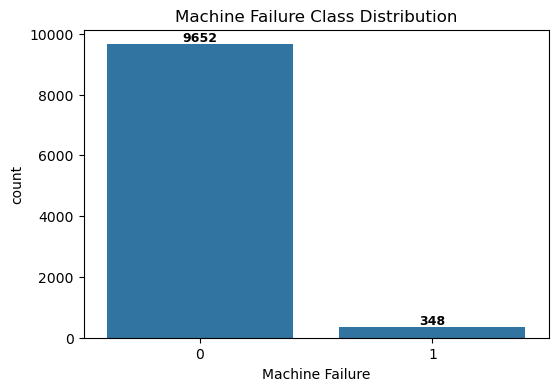

In [17]:
# Class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Machine Failure", data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=9, fontweight='bold', color='black')
plt.title('Machine Failure Class Distribution')
plt.show()

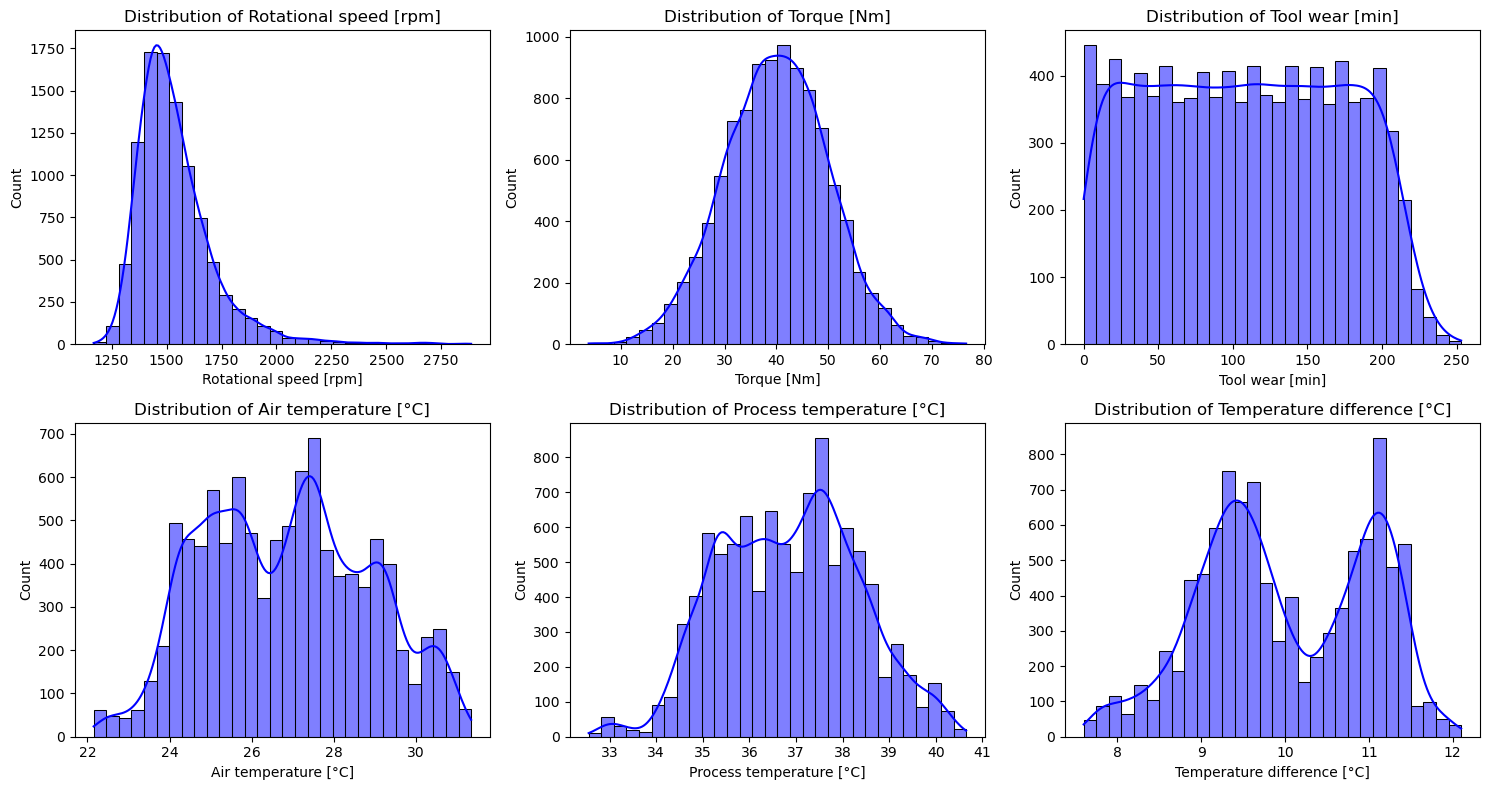

In [18]:
import math

# Specify the columns to remove
exclude_columns = ["Type", "Machine Failure"]

def plot_feature_distributions(df, exclude=[]):
    # Keep only the necessary numerical columns
    df_filtered = df.drop(columns=exclude, errors="ignore")
    num_features = len(df_filtered.columns)

    num_cols = 3  # Maximum 3 plots per row
    num_rows = math.ceil(num_features / num_cols)  # Calculate the required number of rows

    plt.figure(figsize=(15, num_rows * 4))  # Set an appropriate figure size

    for i, column in enumerate(df_filtered.columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(df_filtered[column], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

# Run the function (excluding specified columns)
plot_feature_distributions(df, exclude=exclude_columns)

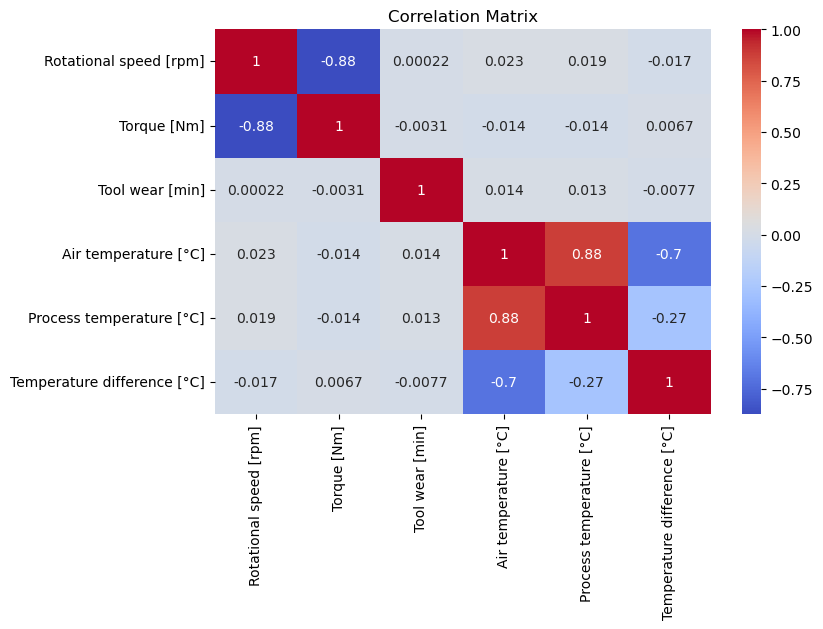

In [19]:
# Check the variables' correlation
df_without_target = df.drop(columns=["Type", "Machine Failure"])

plt.figure(figsize=(8, 5))
sns.heatmap(df_without_target.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

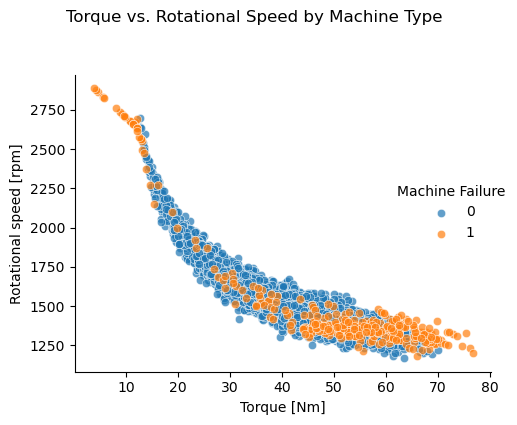

In [20]:
# Use Seaborn for the plot Tprque vs. Rotational Speed
g = sns.FacetGrid(df, hue='Machine Failure', height=4)
g.map(sns.scatterplot, 'Torque [Nm]', 'Rotational speed [rpm]', alpha=0.7)
g.add_legend()

# Use Matplotlib to customize the plot
plt.suptitle('Torque vs. Rotational Speed by Machine Type', y=1.05)
plt.tight_layout()
plt.show()

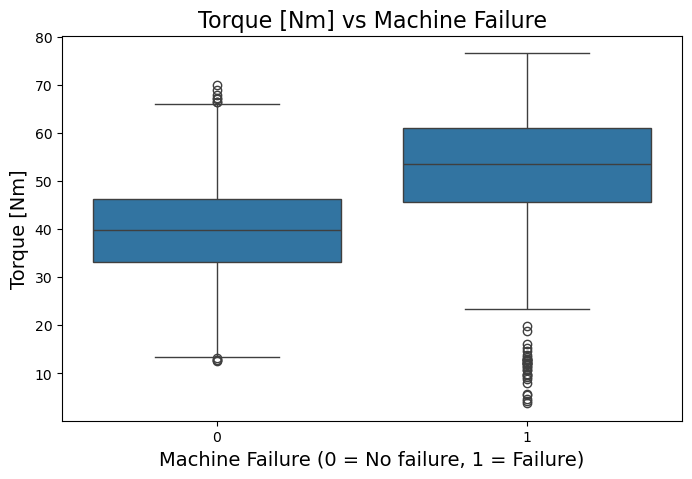

In [21]:
# Use Boxplot to compare Torque for different Machine Failure categories (0: No failure, 1: Failure)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Machine Failure", y="Torque [Nm]", data=df)
plt.title("Torque [Nm] vs Machine Failure", fontsize=16)
plt.xlabel("Machine Failure (0 = No failure, 1 = Failure)", fontsize=14)
plt.ylabel("Torque [Nm]", fontsize=14)
plt.show()

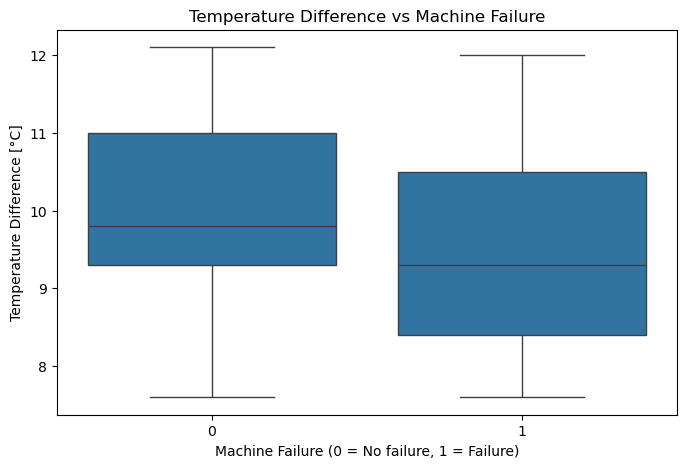

In [22]:
# Use Boxplot to compare Temperature Difference for different Machine Failure categories (0: No failure, 1: Failure)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Machine Failure", y="Temperature difference [°C]", data=df)
plt.title("Temperature Difference vs Machine Failure")
plt.xlabel("Machine Failure (0 = No failure, 1 = Failure)")
plt.ylabel("Temperature Difference [°C]")
plt.show()

### <font color="Red">Feature Selection
</font>

In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define feature variable
X = df.drop(columns=["Machine Failure"])

# Define target variable
y = df[["Machine Failure"]]

# Split the dataset (80% train, 20% test for example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Check the shape of the splits
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Check the balance of each target column
print(f"Train target distribution:\n{y_train.mean()}\n")
print(f"Test target distribution:\n{y_test.mean()}\n")

Train shape: (8000, 7), Test shape: (2000, 7)
Train target distribution:
Machine Failure    0.03475
dtype: float64

Test target distribution:
Machine Failure    0.035
dtype: float64



In [24]:
!pip install imbalanced-learn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encode any object/string columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Continue with scaling and splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Apply SMOTE VS SMOTEENN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Apply SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_scaled, y_train)

# Print class distributions
print("\n Class distribution after SMOTE:")
print(y_train_smote.value_counts())

print("\n Class distribution after SMOTEENN:")
print(y_train_smoteenn.value_counts())


 Class distribution after SMOTE:
Machine Failure
0                  7722
1                  7722
Name: count, dtype: int64

 Class distribution after SMOTEENN:
Machine Failure
1                  7559
0                  7107
Name: count, dtype: int64


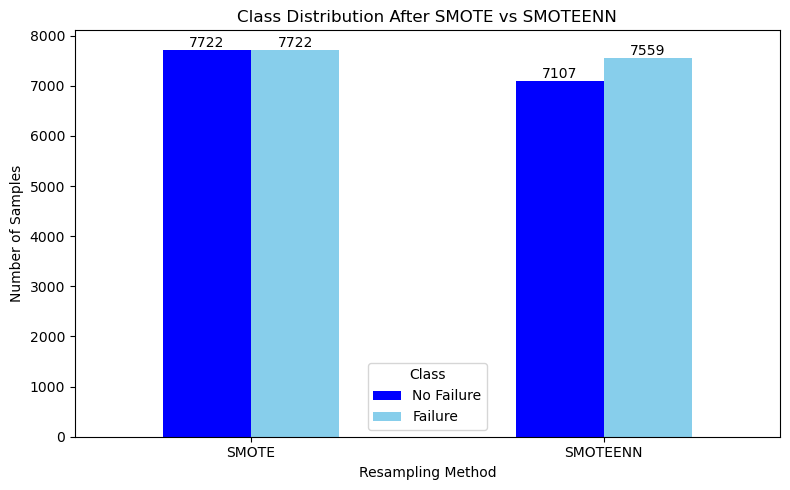

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare DataFrame
df_vis = pd.DataFrame({
    'SMOTE': y_train_smote.value_counts(),
    'SMOTEENN': y_train_smoteenn.value_counts()
}).T
df_vis.columns = ['No Failure', 'Failure']

# Plot
ax = df_vis.plot(kind='bar', stacked=False, figsize=(8, 5), color=['blue', 'skyblue'])

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Formatting
plt.title('Class Distribution After SMOTE vs SMOTEENN')
plt.xlabel('Resampling Method')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.tight_layout()
plt.show()


### Logistic Regression

In [28]:
# Logistic Regression (No Resampling)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train logistic regression directly (no resampling)
logreg_noresample = LogisticRegression(max_iter=1000)
logreg_noresample.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_noresample = logreg_noresample.predict(X_test_scaled)
print("\nClassification Report on Test Set (No Resampling):")
print(classification_report(y_test, y_pred_noresample))


Classification Report on Test Set (No Resampling):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1930
           1       0.70      0.10      0.17        70

    accuracy                           0.97      2000
   macro avg       0.83      0.55      0.58      2000
weighted avg       0.96      0.97      0.95      2000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Logistic Regression (SMOTE)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train logistic regression with SMOTE
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote.values.ravel())

# Predict and evaluate
y_pred_smote = logreg_smote.predict(X_test_scaled)
print("\nClassification Report on Test Set (SMOTE):")
print(classification_report(y_test, y_pred_smote))


Classification Report on Test Set (SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1930
           1       0.14      0.89      0.24        70

    accuracy                           0.80      2000
   macro avg       0.57      0.84      0.56      2000
weighted avg       0.96      0.80      0.86      2000



In [30]:
# Logistic Regression (SMOTEENN)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train logistic regression with SMOTEENN
logreg_smoteenn = LogisticRegression(max_iter=1000)
logreg_smoteenn.fit(X_train_smoteenn, y_train_smoteenn.values.ravel())

# Predict and evaluate
y_pred_smoteenn = logreg_smoteenn.predict(X_test_scaled)
print("\nClassification Report on Test Set (SMOTEENN):")
print(classification_report(y_test, y_pred_smoteenn))


Classification Report on Test Set (SMOTEENN):
              precision    recall  f1-score   support

           0       0.99      0.78      0.88      1930
           1       0.13      0.89      0.23        70

    accuracy                           0.79      2000
   macro avg       0.56      0.83      0.55      2000
weighted avg       0.96      0.79      0.85      2000



In [31]:
import pandas as pd

# Create the summary table
metrics_summary = pd.DataFrame({
    "Model": ["No Resampling", "SMOTE", "SMOTEENN"],
    "Accuracy": [0.97, 0.80, 0.79],
    "Recall (Class 1)": [0.10, 0.89, 0.89],
    "Precision (Class 1)": [0.70, 0.14, 0.13],
    "F1-Score (Class 1)": [0.17, 0.24, 0.23]
})

# Show the table
print("Logistic Regression Model Comparison:\n")
display(metrics_summary)

Logistic Regression Model Comparison:



,Model,Accuracy,Recall (Class 1),Precision (Class 1),F1-Score (Class 1)
0,No Resampling,0.97,0.10,0.70,0.17
1,SMOTE,0.80,0.89,0.14,0.24
2,SMOTEENN,0.79,0.89,0.13,0.23


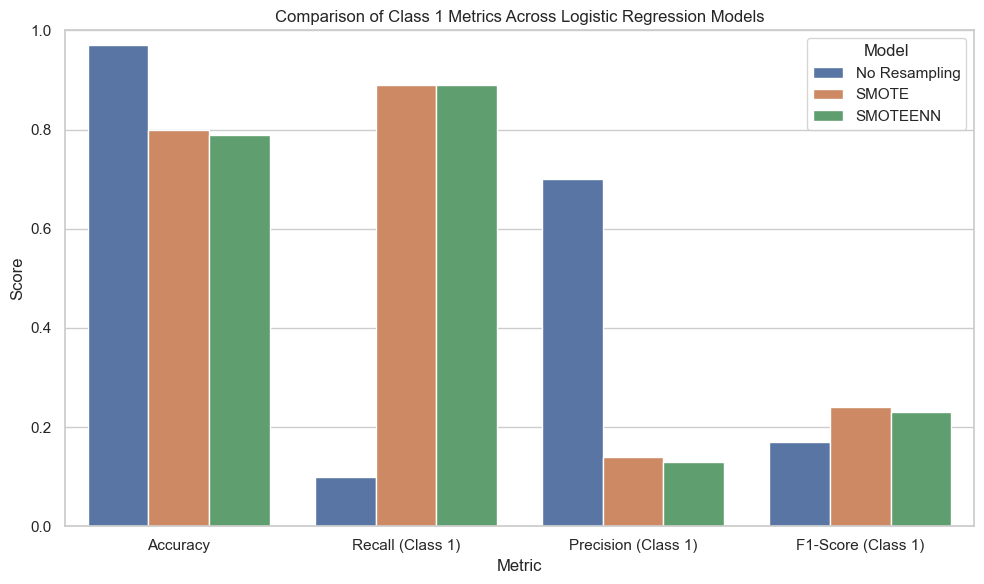

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame for easy plotting
melted = metrics_summary.melt(id_vars="Model",
                              value_vars=["Accuracy","Recall (Class 1)", "Precision (Class 1)", "F1-Score (Class 1)"],
                              var_name="Metric", value_name="Score")

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=melted)
plt.title("Comparison of Class 1 Metrics Across Logistic Regression Models")
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.legend(title="Model")
plt.tight_layout()
plt.show()

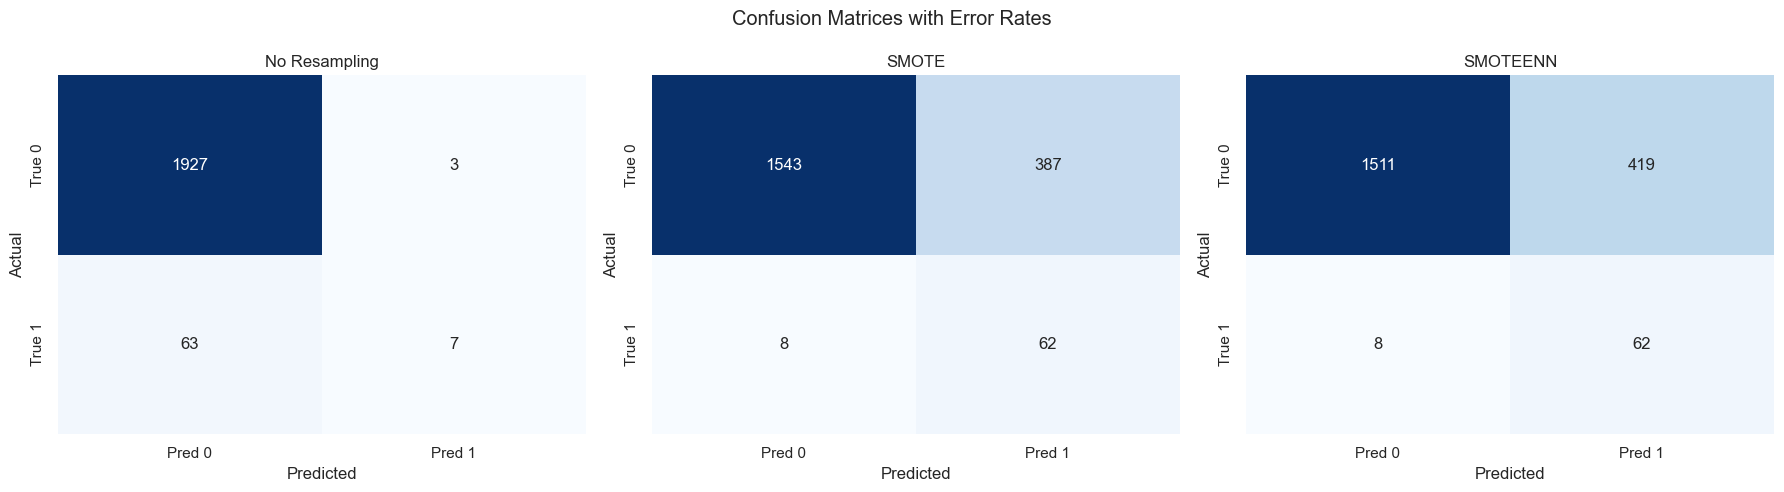

Error Rate (No Resampling): 0.0330
Error Rate (SMOTE):         0.1975
Error Rate (SMOTEENN):      0.2135


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix and return error rate
def plot_cm_and_error(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    # Plot the matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["True 0", "True 1"],
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    # Calculate error rate
    incorrect = cm[0,1] + cm[1,0]
    total = cm.sum()
    error_rate = incorrect / total
    return error_rate

# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each confusion matrix and calculate error rate
error_noresample = plot_cm_and_error(y_test, y_pred_noresample, "No Resampling", axes[0])
error_smote = plot_cm_and_error(y_test, y_pred_smote, "SMOTE", axes[1])
error_smoteenn = plot_cm_and_error(y_test, y_pred_smoteenn, "SMOTEENN", axes[2])

plt.suptitle("Confusion Matrices with Error Rates")
plt.tight_layout()
plt.show()

# Print error rates side by side
print(f"Error Rate (No Resampling): {error_noresample:.4f}")
print(f"Error Rate (SMOTE):         {error_smote:.4f}")
print(f"Error Rate (SMOTEENN):      {error_smoteenn:.4f}")

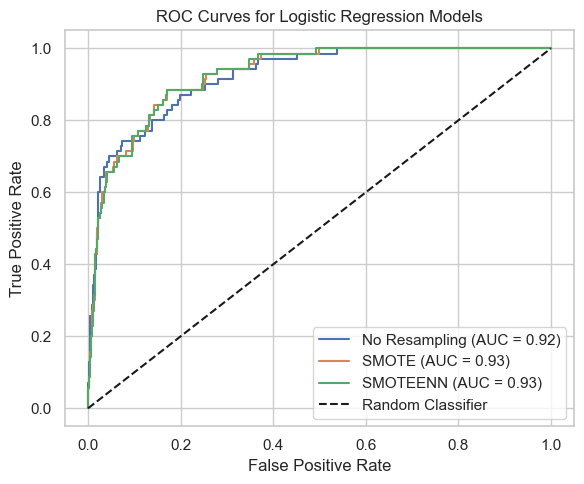

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities (positive class only)
y_proba_noresample = logreg_noresample.predict_proba(X_test_scaled)[:, 1]
y_proba_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]
y_proba_smoteenn = logreg_smoteenn.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curves and AUC scores
fpr_nr, tpr_nr, _ = roc_curve(y_test, y_proba_noresample)
fpr_sm, tpr_sm, _ = roc_curve(y_test, y_proba_smote)
fpr_se, tpr_se, _ = roc_curve(y_test, y_proba_smoteenn)

auc_nr = roc_auc_score(y_test, y_proba_noresample)
auc_sm = roc_auc_score(y_test, y_proba_smote)
auc_se = roc_auc_score(y_test, y_proba_smoteenn)

# Plot ROC curves
plt.figure(figsize=(6, 5))
plt.plot(fpr_nr, tpr_nr, label=f"No Resampling (AUC = {auc_nr:.2f})")
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE (AUC = {auc_sm:.2f})")
plt.plot(fpr_se, tpr_se, label=f"SMOTEENN (AUC = {auc_se:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Logistic Regression Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Convert y_train and y_test to 1D arrays
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train_1d)
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test_1d, y_pred))


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1930
           1       0.94      0.70      0.80        70

    accuracy                           0.99      2000
   macro avg       0.97      0.85      0.90      2000
weighted avg       0.99      0.99      0.99      2000



ROC-AUC: 0.9829607698001481


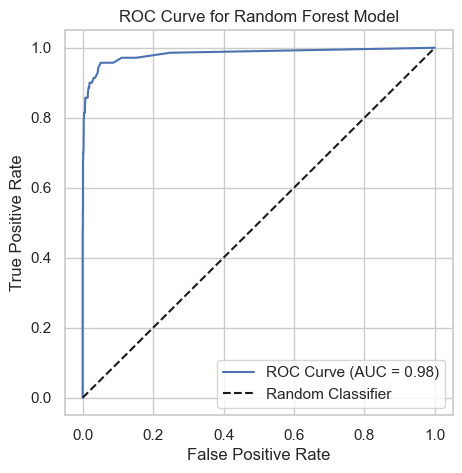

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Flatten y_test to 1D
y_test_1d = y_test.values.ravel()

# Predict probability scores for ROC-AUC
y_rf_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test_1d, y_rf_pred_proba)
print("ROC-AUC:", auc_score)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_1d, y_rf_pred_proba)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Model")
plt.grid(True)
plt.legend()
plt.show()

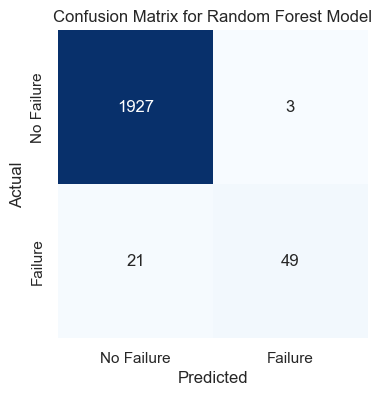

Error Rate: 0.0120


In [37]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
rf_cm = confusion_matrix(y_test_1d, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',cbar=False, xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

# Calculate error rate
incorrect = rf_cm[0,1] + rf_cm[1,0]
total = rf_cm.sum()
rf_error_rate = incorrect / total

# Print error rates
print(f"Error Rate: {rf_error_rate:.4f}")


Feature Importance in Random Forest:
                       Feature  Importance
2                  Torque [Nm]    0.298333
1       Rotational speed [rpm]    0.257626
6  Temperature difference [°C]    0.147991
3              Tool wear [min]    0.144409
4         Air temperature [°C]    0.068298
5     Process temperature [°C]    0.064834
0                         Type    0.018510


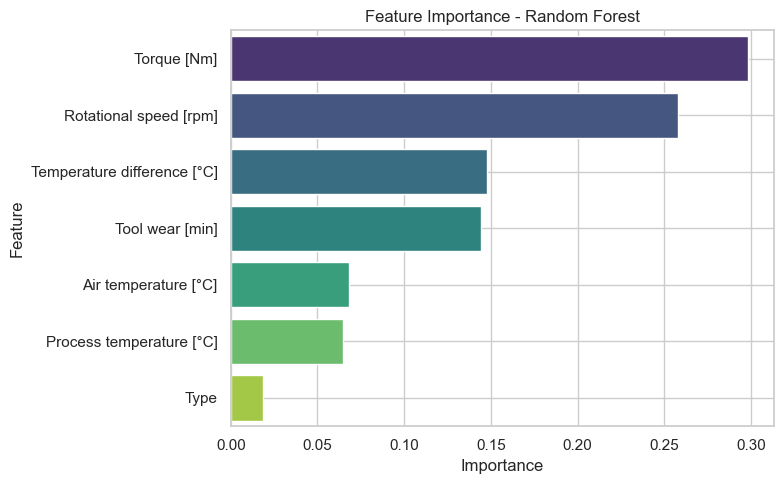

In [38]:
# Get feature names
feature_names = X.columns

# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame of features and their importances
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("\nFeature Importance in Random Forest:")
print(rf_importance_df.head(10))

# Plot features importance in sequence
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=rf_importance_df.head(10),
    hue='Feature',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

### Support Vector Machines (SVM)

In [50]:
# Support Vector Machines (SVM) (No Resampling)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM directly (no Resampling)
svm_noresample = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_noresample.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_noresample = svm_noresample.predict(X_test_scaled)
print("\nClassification Report for SVM Model (No Resampling):")
print(classification_report(y_test, y_pred_noresample))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report for SVM Model (No Resampling):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1930
           1       0.31      0.91      0.47        70

    accuracy                           0.93      2000
   macro avg       0.66      0.92      0.71      2000
weighted avg       0.97      0.93      0.94      2000



In [40]:
# Support Vector Machines (SVM) (SMOTE)
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Scale before applying SMOTE
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE after scaling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train SVM with SMOTE
svm_smote = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_smote.fit(X_train_smote, y_train_smote.values.ravel())

# Predict and evaluate
y_pred_smote = svm_smote.predict(X_test_scaled)
print("\nClassification Report for SVM Model (SMOTE):")
print(classification_report(y_test, y_pred_smote))


Classification Report for SVM Model (SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.94      0.96      1930
           1       0.34      0.91      0.49        70

    accuracy                           0.93      2000
   macro avg       0.67      0.92      0.73      2000
weighted avg       0.97      0.93      0.95      2000



In [41]:
# Support Vector Machines (SVM) (SMOTEENN)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Apply SMOTEENN after scaling
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_scaled, y_train)

# Train SVM with SMOTEENN
svm_smoteenn = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_smoteenn.fit(X_train_smoteenn, y_train_smoteenn.values.ravel())

# Predict and evaluate
y_pred_smoteenn = svm_smoteenn.predict(X_test_scaled)
print("\nClassification Report for SVM Model (SMOTEENN):")
print(classification_report(y_test, y_pred_smoteenn))


Classification Report for SVM Model (SMOTEENN):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1930
           1       0.29      0.91      0.44        70

    accuracy                           0.92      2000
   macro avg       0.65      0.92      0.70      2000
weighted avg       0.97      0.92      0.94      2000



In [42]:
import pandas as pd

# Create the summary table
metrics_summary = pd.DataFrame({
    "Model": ["No Resampling", "SMOTE", "SMOTEENN"],
    "Accuracy": [0.93, 0.93, 0.92],
    "Recall (Class 1)": [0.91, 0.91, 0.91],
    "Precision (Class 1)": [0.31, 0.34, 0.29],
    "F1-Score (Class 1)": [0.47, 0.49, 0.44]
})

# Show the table
print("Support Vector Machines Comparison:\n")
display(metrics_summary)

Support Vector Machines Comparison:



,Model,Accuracy,Recall (Class 1),Precision (Class 1),F1-Score (Class 1)
0,No Resampling,0.93,0.91,0.31,0.47
1,SMOTE,0.93,0.91,0.34,0.49
2,SMOTEENN,0.92,0.91,0.29,0.44


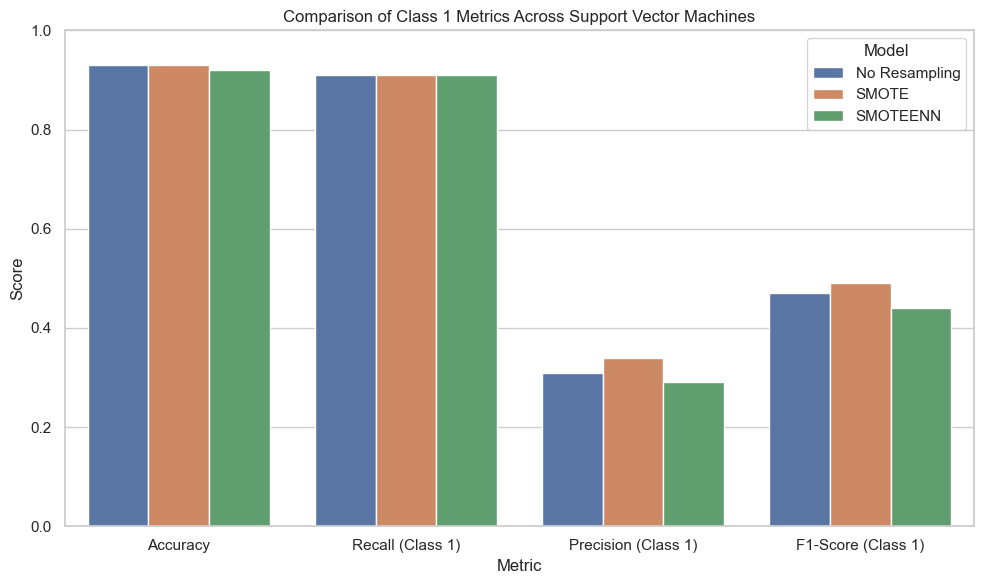

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame for easy plotting
melted = metrics_summary.melt(id_vars="Model",
                              value_vars=["Accuracy","Recall (Class 1)", "Precision (Class 1)", "F1-Score (Class 1)"],
                              var_name="Metric", value_name="Score")

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=melted)
plt.title("Comparison of Class 1 Metrics Across Support Vector Machines")
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.legend(title="Model")
plt.tight_layout()
plt.show()

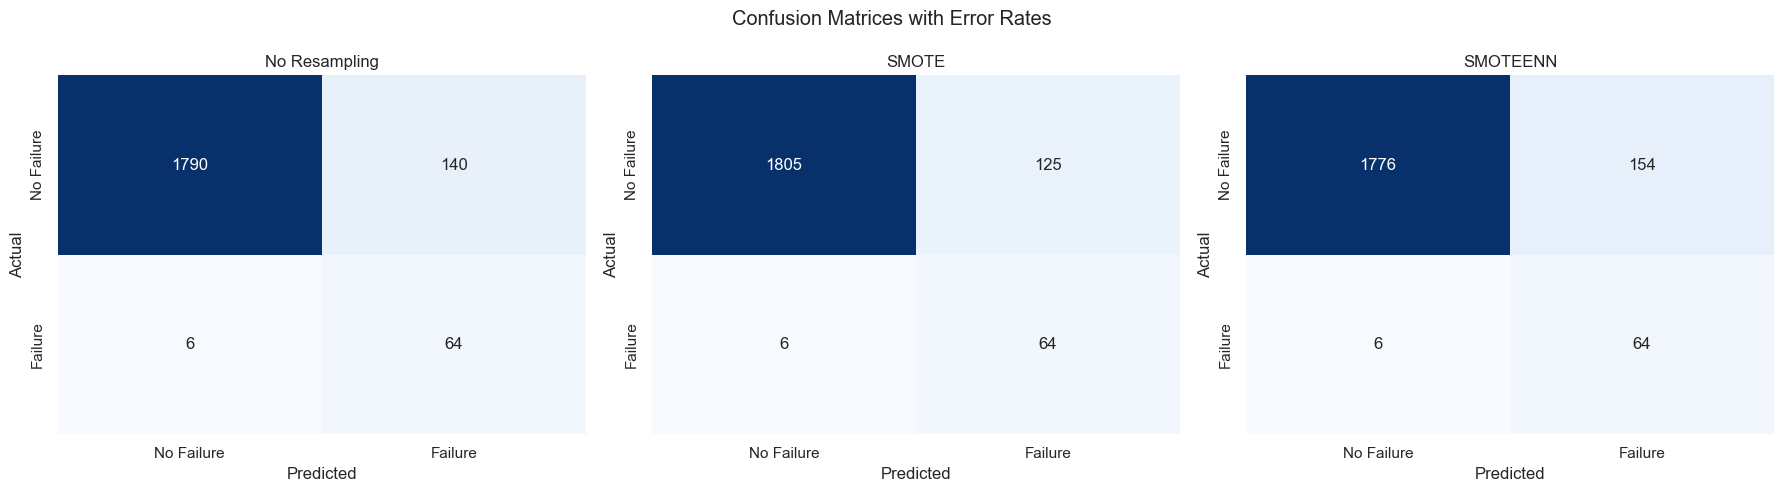

Error Rate (No Resampling): 0.0730
Error Rate (SMOTE):         0.0655
Error Rate (SMOTEENN):      0.0800


In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix and return error rate
def plot_cm_and_error(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    # Plot the matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["No Failure", "Failure"],
                yticklabels=["No Failure", "Failure"],
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    # Calculate error rate
    incorrect = cm[0,1] + cm[1,0]
    total = cm.sum()
    error_rate = incorrect / total
    return error_rate

# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each confusion matrix and calculate error rate
error_noresample = plot_cm_and_error(y_test, y_pred_noresample, "No Resampling", axes[0])
error_smote = plot_cm_and_error(y_test, y_pred_smote, "SMOTE", axes[1])
error_smoteenn = plot_cm_and_error(y_test, y_pred_smoteenn, "SMOTEENN", axes[2])

plt.suptitle("Confusion Matrices with Error Rates")
plt.tight_layout()
plt.show()

# Print error rates side by side
print(f"Error Rate (No Resampling): {error_noresample:.4f}")
print(f"Error Rate (SMOTE):         {error_smote:.4f}")
print(f"Error Rate (SMOTEENN):      {error_smoteenn:.4f}")

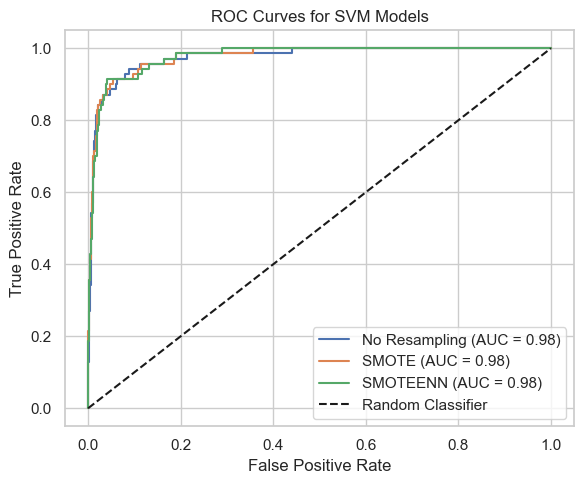

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get decision scores
y_scores_noresample = svm_noresample.decision_function(X_test_scaled)
y_scores_smote = svm_smote.decision_function(X_test_scaled)
y_scores_smoteenn = svm_smoteenn.decision_function(X_test_scaled)

# Compute ROC curves and AUC scores
fpr_nr, tpr_nr, _ = roc_curve(y_test, y_scores_noresample)
fpr_sm, tpr_sm, _ = roc_curve(y_test, y_scores_smote)
fpr_se, tpr_se, _ = roc_curve(y_test, y_scores_smoteenn)

auc_nr = roc_auc_score(y_test, y_scores_noresample)
auc_sm = roc_auc_score(y_test, y_scores_smote)
auc_se = roc_auc_score(y_test, y_scores_smoteenn)

# Plot ROC curves
plt.figure(figsize=(6, 5))
plt.plot(fpr_nr, tpr_nr, label=f"No Resampling (AUC = {auc_nr:.2f})")
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE (AUC = {auc_sm:.2f})")
plt.plot(fpr_se, tpr_se, label=f"SMOTEENN (AUC = {auc_se:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for SVM Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

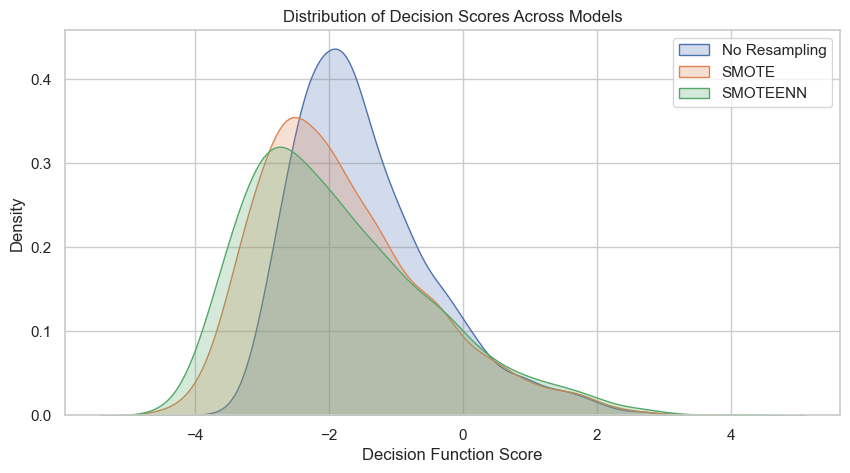

In [46]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(y_scores_noresample, label="No Resampling", fill=True)
sns.kdeplot(y_scores_smote, label="SMOTE", fill=True)
sns.kdeplot(y_scores_smoteenn, label="SMOTEENN", fill=True)
plt.legend()
plt.title("Distribution of Decision Scores Across Models")
plt.xlabel("Decision Function Score")
plt.ylabel("Density")
plt.show()


##Comparison##

In [47]:
import pandas as pd

# Create the summary table
overall_model_summary = pd.DataFrame({
    "Model": ["Logistic SMOTE", "Random Forest", "SVM SMOTE"],
    "Recall": [0.89, 0.70, 0.91],
    "F1-Score (Class 1)": [0.24, 0.80, 0.49]
})

# Show the table
print("Overall Model Comparison:\n")
display(overall_model_summary)

Overall Model Comparison:



,Model,Recall,F1-Score (Class 1)
0,Logistic SMOTE,0.89,0.24
1,Random Forest,0.70,0.80
2,SVM SMOTE,0.91,0.49


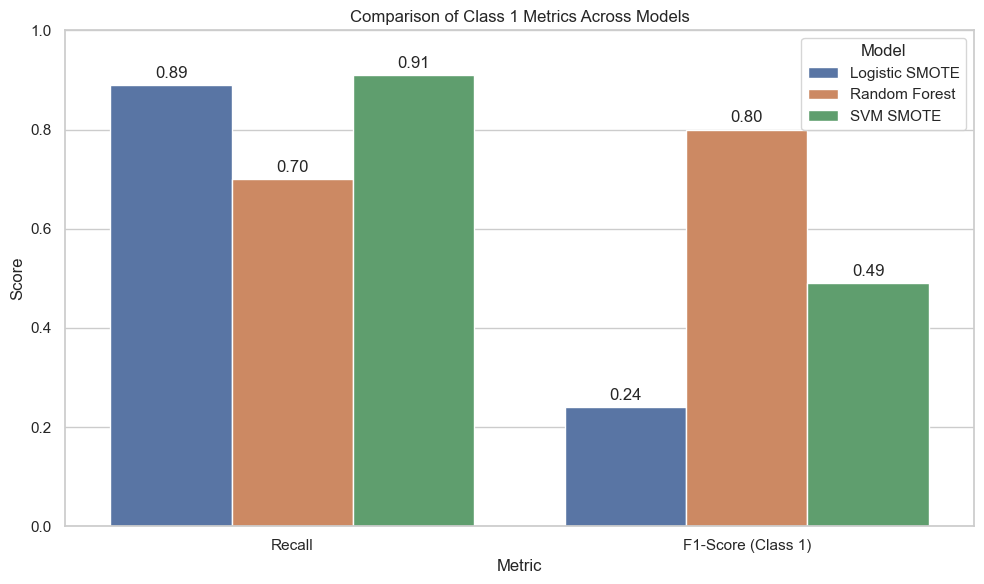

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame for easy plotting
melted = overall_model_summary.melt(
    id_vars="Model",
    value_vars=["Recall", "F1-Score (Class 1)"],
    var_name="Metric",
    value_name="Score"
)

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Metric", y="Score", hue="Model", data=melted)
plt.title("Comparison of Class 1 Metrics Across Models")
plt.ylim(0, 1)
plt.legend(title="Model")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()

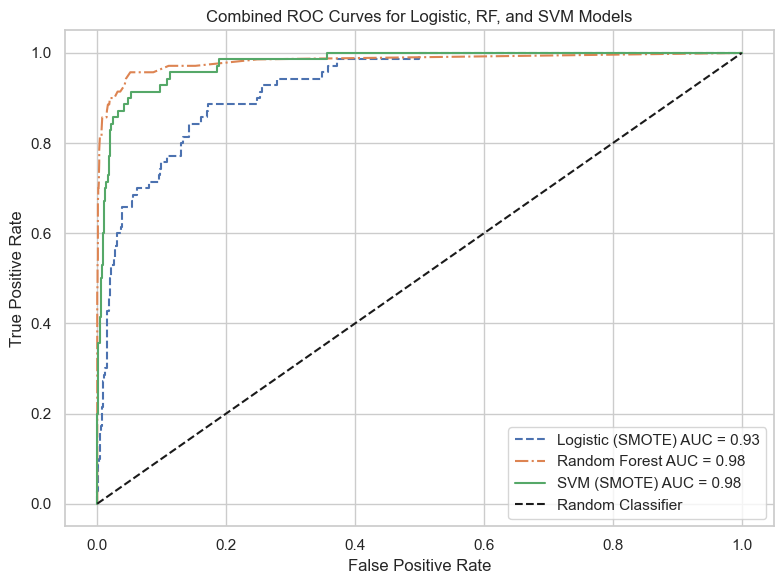

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- 1. Logistic Regression (SMOTE) ---
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote.values.ravel())
y_proba_logreg_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logreg_smote)
auc_log = roc_auc_score(y_test, y_proba_logreg_smote)

# --- 2. Random Forest ---
y_proba_rf = model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_1d, y_proba_rf)
auc_rf = roc_auc_score(y_test_1d, y_proba_rf)

# --- 3. SVM (SMOTE) ---
y_scores_svm = svm_smote.decision_function(X_test_scaled)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
auc_svm = roc_auc_score(y_test, y_scores_svm)

# --- 4. Plot Combined ROC Curves ---
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label=f"Logistic (SMOTE) AUC = {auc_log:.2f}", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {auc_rf:.2f}", linestyle='-.')
plt.plot(fpr_svm, tpr_svm, label=f"SVM (SMOTE) AUC = {auc_svm:.2f}", linestyle='-')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Axis labels and chart formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curves for Logistic, RF, and SVM Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
